<div class="alert alert-block alert-info">
<b>SSIM
    </div>

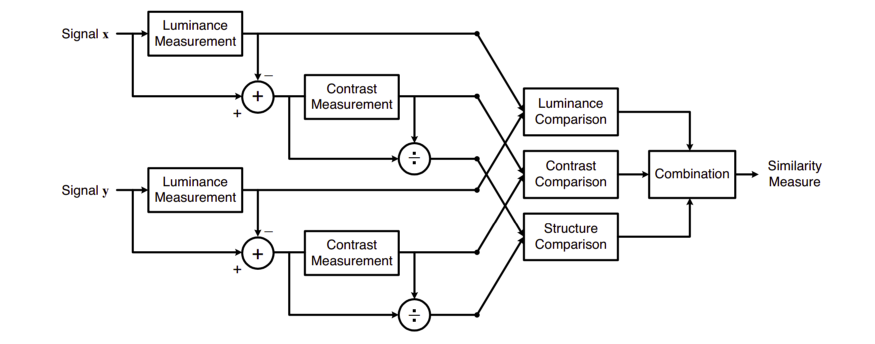

In [17]:
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
import image_similarity_measures
from image_similarity_measures.quality_metrics import rmse, psnr, ssim, sre
## Note that images that are used for evaluation should be channel last -> this means image array shuold be of the form 
## (rows,columns,channels)
import imageio 
import cv2
import os
from sys import argv


In [48]:
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt


In [49]:
## One pair test 
im0 = imageio.imread(r"C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\ref_S2A_20160608T153121_T33UUU_sub.tif")
im1 = imageio.imread(r"C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\tgt_S2A_20160529T153631_T33UUU_sub.tif")

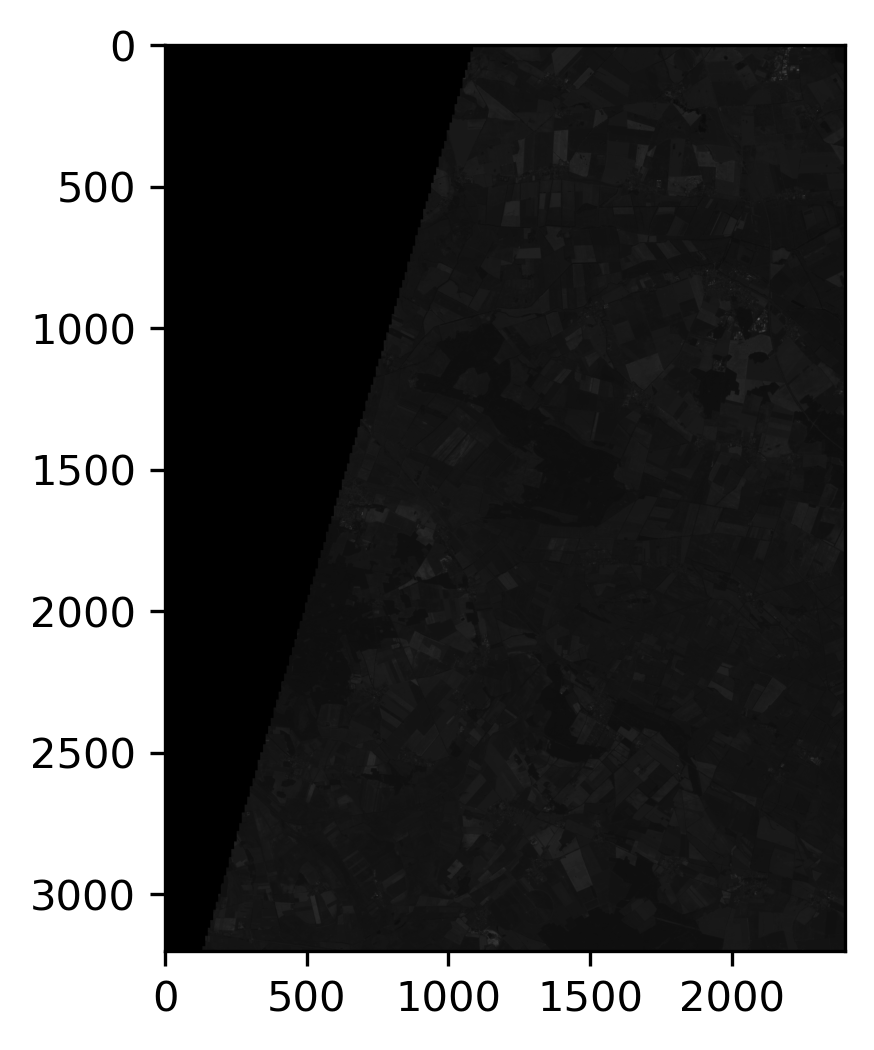

In [50]:
fig, ax = plt.subplots()
plt.imshow(im0,cmap="gray")
plt.show()

(array([1952567.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0., 

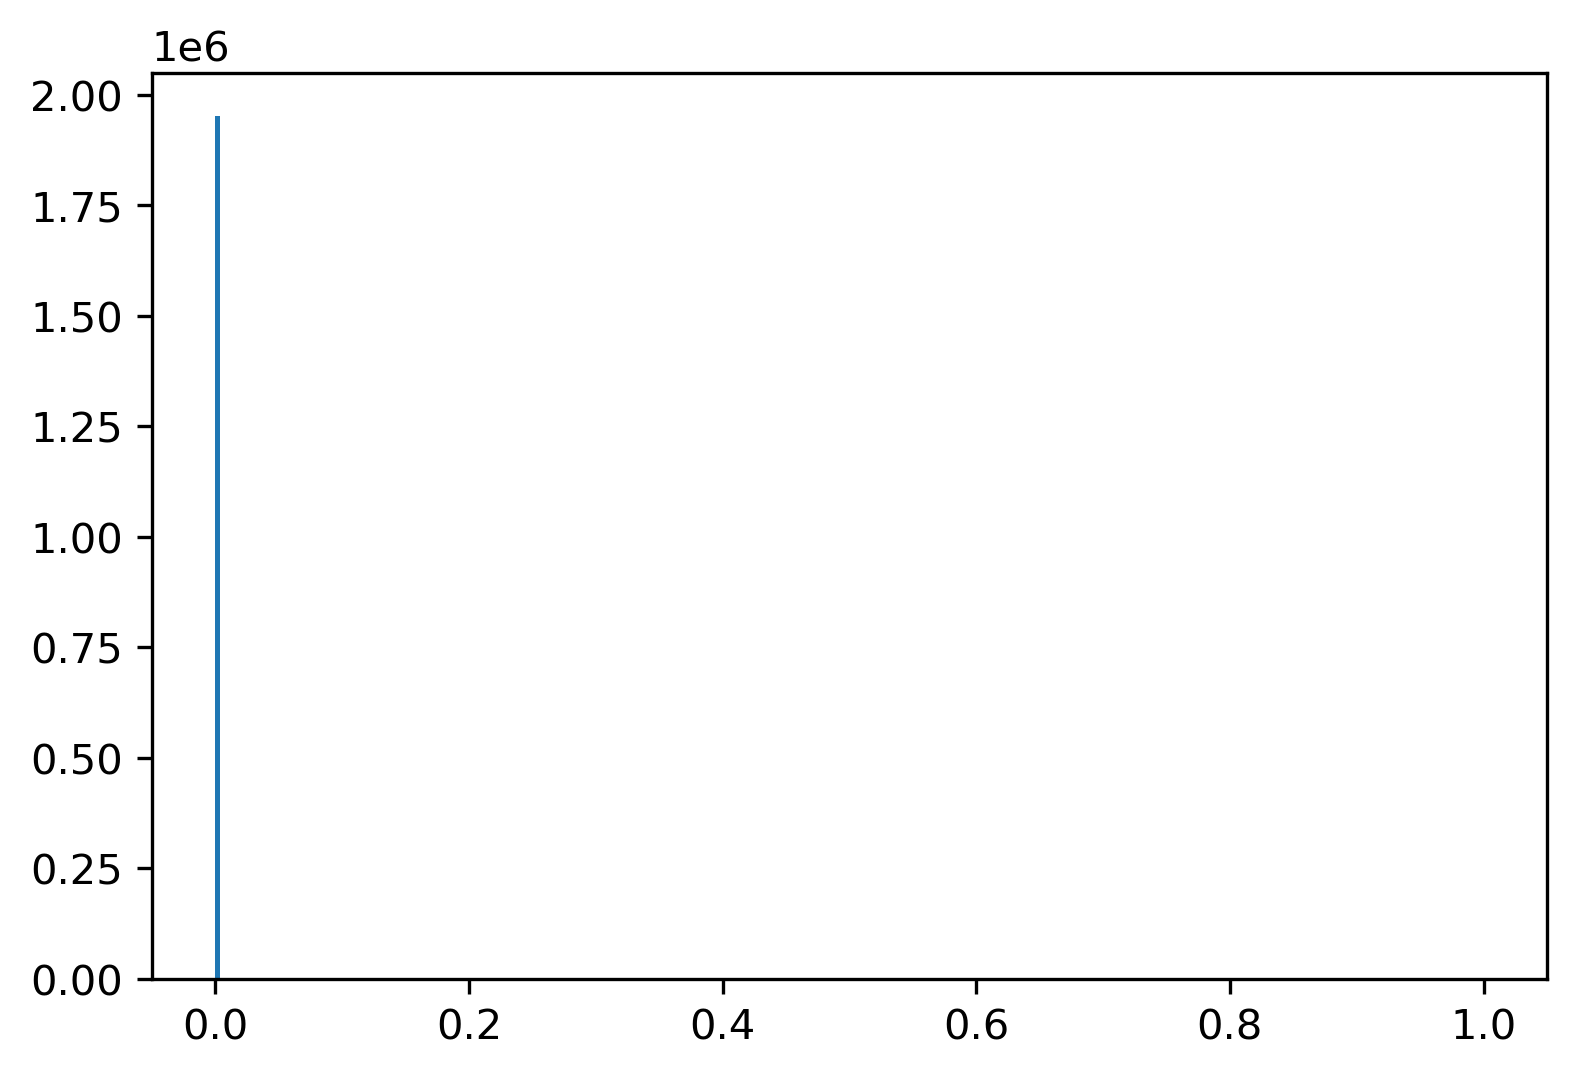

In [54]:
plt.hist(im0.flatten(), bins=256, range=(0, 1))

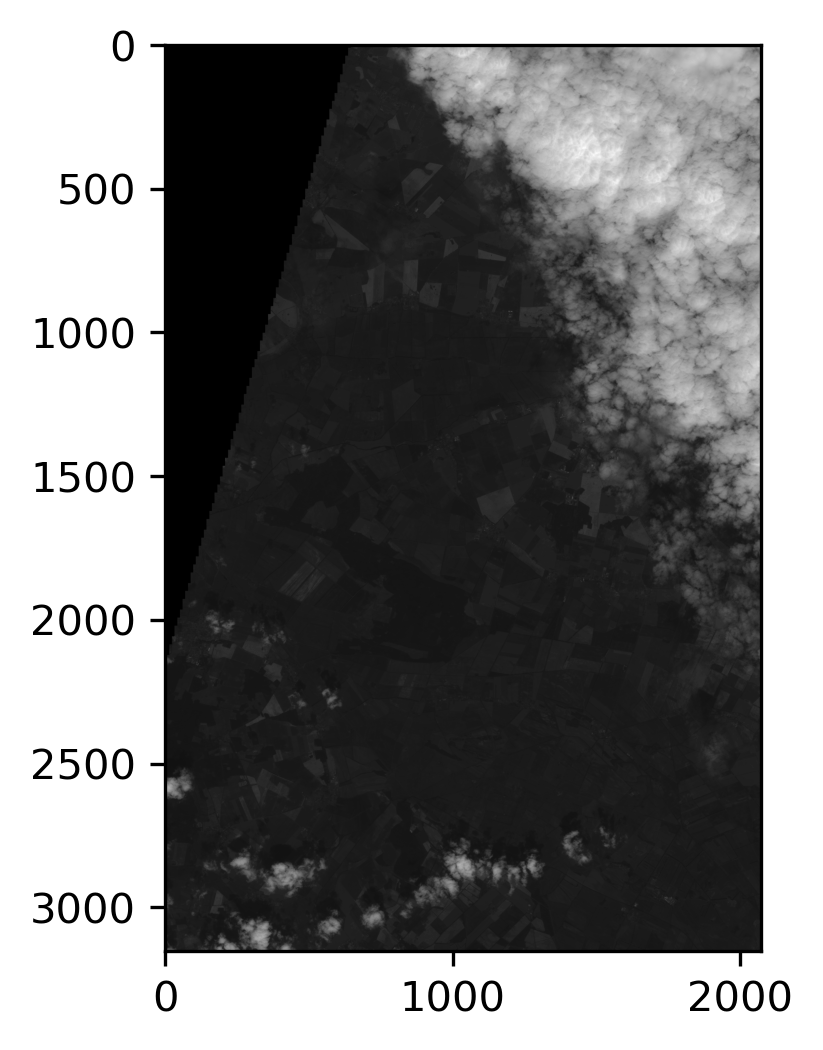

In [41]:
fig, ax = plt.subplots()
plt.imshow(im1,cmap="gray")
plt.show()

In [32]:
from sewar import full_ref as fr
help(fr) 

Help on module sewar.full_ref in sewar:

NAME
    sewar.full_ref

FUNCTIONS
    ergas(GT, P, r=4, ws=8)
        calculates erreur relative globale adimensionnelle de synthese (ergas).
        
        :param GT: first (original) input image.
        :param P: second (deformed) input image.
        :param r: ratio of high resolution to low resolution (default=4).
        :param ws: sliding window size (default = 8).
        
        :returns:  float -- ergas value.
    
    log10(...)
        log10(x)
        
        Return the base 10 logarithm of x.
    
    log2(...)
        log2(x)
        
        Return the base 2 logarithm of x.
    
    mse(GT, P)
        calculates mean squared error (mse).
        
        :param GT: first (original) input image.
        :param P: second (deformed) input image.
        
        :returns:  float -- mse value.
    
    msssim(GT, P, weights=[0.0448, 0.2856, 0.3001, 0.2363, 0.1333], ws=11, K1=0.01, K2=0.03, MAX=None)
        calculates multi-sca

### Sample Metrics 
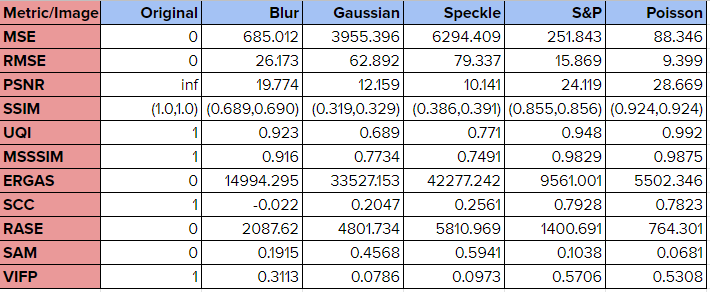

In [34]:
from sewar import utils as utis 
from sewar import no_ref as nr 
help(utis)
help(nr)

Help on module sewar.utils in sewar:

NAME
    sewar.utils

CLASSES
    enum.Enum(builtins.object)
        Filter
    
    class Filter(enum.Enum)
     |  An enumeration.
     |  
     |  Method resolution order:
     |      Filter
     |      enum.Enum
     |      builtins.object
     |  
     |  Data and other attributes defined here:
     |  
     |  GAUSSIAN = <Filter.GAUSSIAN: 1>
     |  
     |  UNIFORM = <Filter.UNIFORM: 0>
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors inherited from enum.Enum:
     |  
     |  name
     |      The name of the Enum member.
     |  
     |  value
     |      The value of the Enum member.
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors inherited from enum.EnumMeta:
     |  
     |  __members__
     |      Returns a mapping of member name->value.
     |      
     |      This mapping lists all enum members, including a

In [30]:
from image_similarity_measures import quality_metrics as qm 
help(qm) 

Help on module image_similarity_measures.quality_metrics in image_similarity_measures:

NAME
    image_similarity_measures.quality_metrics

DESCRIPTION
    This module is a collection of metrics to assess the similarity between two images.
    PSNR, SSIM, FSIM and ISSM are the current metrics that are implemented in this module.

FUNCTIONS
    fsim(org_img:numpy.ndarray, pred_img:numpy.ndarray, T1=0.85, T2=160) -> float
        Feature-based similarity index, based on phase congruency (PC) and image gradient magnitude (GM)
        
        There are different ways to implement PC, the authors of the original FSIM paper use the method
        defined by Kovesi (1999). The Python phasepack project fortunately provides an implementation
        of the approach.
        
        There are also alternatives to implement GM, the FSIM authors suggest to use the Scharr
        operation which is implemented in OpenCV.
        
        Note that FSIM is defined in the original papers for graysc

In [29]:
from image_similarity_measures import evaluate as evu 
help(evu)

Help on module image_similarity_measures.evaluate in image_similarity_measures:

NAME
    image_similarity_measures.evaluate

FUNCTIONS
    evaluation(org_img_path, pred_img_path, metrics)
    
    main()
    
    read_image(path)

DATA
    logger = <Logger image_similarity_measures.evaluate (WARNING)>
    metric_functions = {'fsim': <function fsim>, 'issm': <function issm>, ...

FILE
    c:\users\vasud\.conda\envs\coreg_build\lib\site-packages\image_similarity_measures\evaluate.py




In [9]:
gt_rootdir = r"C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\ground_truth"
ref_rootdir = r"C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\reference"
tgt_rootdir = r"C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\target"
list_gt_paths = []
list_ref_paths = []
list_tgt_paths = []
for subdir, dirs, files in os.walk(ref_rootdir):
    for file in files:
        ref_tile = os.path.join(subdir, file) #returns string of absolute path 
        list_ref_paths.append(ref_tile)
for subdir, dirs, files in os.walk(tgt_rootdir):
    for file in files:
        tgt_tile = os.path.join(subdir, file) 
        list_tgt_paths.append(tgt_tile)
for subdir, dirs, files in os.walk(gt_rootdir):
    for file in files:
        gt_tile = os.path.join(subdir, file) 
        list_gt_paths.append(gt_tile)
print("Total number of tiles (gt,ref,tgt) = {},{},{}".format(len(list_gt_paths),len(list_ref_paths),len(list_tgt_paths)))  

Total number of tiles (gt,ref,tgt) = 1292,1292,1292


def calc_closest_val(list_ref_paths,list_tgt_paths): 
    for (path1,path2) in zip(list_ref_paths,list_tgt_paths):

        try:

            im0,im1 = imageio.imread(path1),imageio.imread(path2)

            ## pass paths of im0,im1 to class as params 
            width = int(im0.shape[1])
            height = int(im0.shape[0])

            img_size = (width,height)
            im1 = cv2.resize(im1,img_size)

            ## Convert RGBA to RGB -> target image     
            im1=rgba2rgb(im1)


In [55]:
# ssim = calc_closest_val(ssim_measures, True)
# rmse = calc_closest_val(rmse_measures, False)
# sre = calc_closest_val(sre_measures, True)

# print("The most similar according to SSIM: " , ssim)
# print("The most similar according to RMSE: " , rmse)
# print("The most similar according to SRE: " , sre)



***

`http://mubeta06.github.io/python/sp/index.html#`

In [ ]:
import pylab
import numpy
from sp import ssim
from PIL import Image
einstein = numpy.asarray(Image.open('./imgs/einstein.tif'))
meanshift = numpy.asarray(Image.open('./imgs/meanshift.tif'))
contrast = numpy.asarray(Image.open('./imgs/contrast.tif'))
impulse = numpy.asarray(Image.open('./imgs/impulse.tif'))
blur = numpy.asarray(Image.open('./imgs/blur.tif'))
jpg = numpy.asarray(Image.open('./imgs/jpg.tif'))
einstein_ssim = ssim.ssim(einstein, einstein)
meanshift_ssim = ssim.ssim(einstein, meanshift)
contrast_ssim = ssim.ssim(einstein, contrast)
impulse_ssim = ssim.ssim(einstein, impulse)
blur_ssim = ssim.ssim(einstein, blur)
jpg_ssim = ssim.ssim(einstein, jpg)
pylab.figure()
pylab.subplot(2, 3, 1)
pylab.title('Original\n SSIM %.3f' % einstein_ssim.mean())
pylab.imshow(einstein, cmap=pylab.gray())
pylab.subplot(2, 3, 2)
pylab.title('Mean-Shifted\n SSIM %.3f' % meanshift_ssim.mean())
pylab.imshow(meanshift, cmap=pylab.gray())
pylab.subplot(2, 3, 3)
pylab.title('Contrast-Adjusted\n SSIM %.3f' % contrast_ssim.mean())
pylab.imshow(contrast, cmap=pylab.gray())
pylab.subplot(2, 3, 4)
pylab.title('Impulse-Noise\n SSIM %.3f' % impulse_ssim.mean())
pylab.imshow(impulse, cmap=pylab.gray())
pylab.subplot(2, 3, 5)
pylab.title('Blur\n SSIM %.3f' % blur_ssim.mean())
pylab.imshow(blur, cmap=pylab.gray())
pylab.subplot(2, 3, 6)
pylab.title('JPG\n SSIM %.3f' % jpg_ssim.mean())
pylab.imshow(jpg, cmap=pylab.gray())
pylab.show()

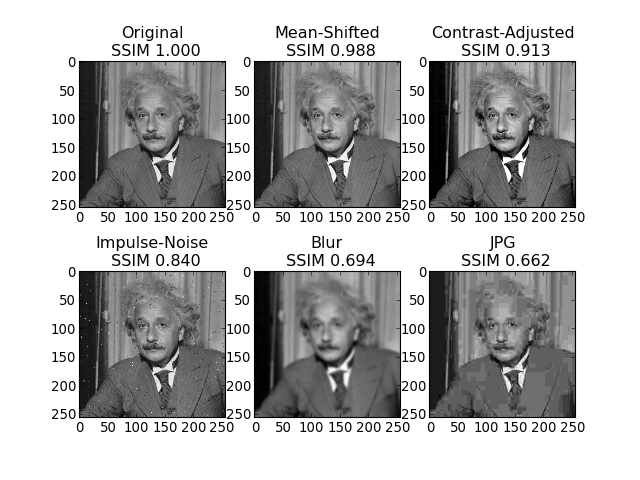

In [1]:
def swv(iterable, size=2):
    i = iter(iterable)
    win = []
    for e in range(0, size):
        win.append(next(i))
    yield win
    for e in i:
        win = win[1:] + [e]
        yield win

> Code Credit
`https://github.com/richikothari07/Structural-similarity-between-two-matrices`

In [2]:
from sklearn.metrics import mean_squared_error
import numpy as np
# from numpy.lib.stride_tricks import sliding_window_view as swv
import unittest
import cv2
import imageio

def normalize_2d(matrix):
    """
    :param matrix: Matrix
    :return: Normalized matrix
    """
    norm = np.linalg.norm(matrix)
    matrix = matrix / norm
    return matrix

def _sum(arr):
    """
    :param arr: Array of matrix
    :return: sum of array
    """
    s = 0
    for i in arr:
        s = s + i
    return s

def r_mse(matrix1, matrix2):
    """
    :param matrix1: matrix1 in form of single array
    :param matrix2: matrix2 in form of single array
    :return: Root mean square error
    """

    normalized_matrix1 = normalize_2d(matrix1)
    normalized_matrix2 = normalize_2d(matrix2)

    """ Calculate root mean square error """
    mse = mean_squared_error(normalized_matrix1, normalized_matrix2)
    rmse = np.sqrt(mse)
    return rmse


def s_sim(matrix1, matrix2):
    """
    :param matrix1: matrix 1 in the form of single array
    :param matrix2: matrix 2 in the form of single array
    :return: Structural Similarity Index Metric
    """

    normalized_matrix1 = normalize_2d(matrix1)
    normalized_matrix2 = normalize_2d(matrix2)
    """ Calculate mean of normalized matrix """
    m1 = np.mean(normalized_matrix1)
    m2 = np.mean(normalized_matrix2)
    """ Calculate standard deviation of normalized matrix"""
    s1 = np.std(normalized_matrix1)
    s2 = np.std(normalized_matrix2)
    """ Calculating three parameters of Structural similarity index - Luminance, Contrast, Structure """
    lum = (2 * m1 * m2) / (m1 ** 2 + m2 ** 2)
    con = (2 * s1 * s2) / (s1 ** 2 + s2 ** 2)
    strut = (((np.cov(normalized_matrix1, normalized_matrix2))[0, 1]) / (s1 * s2)) * (
                (len(normalized_matrix1) - 1) / (len(normalized_matrix1)))
    """ Calculate Structural Similarity Index Metric whose range is (-1,1) """
    ssim = (lum * con * strut)
    """ Converting it into range of (0,1) where 0 indicates structural similarity and 1 indicates dissimilarity """
    ssim1 = (1 - ((1 + ssim) / 2))
    return ssim1


def mean_ssim(row1, column1, row2, column2, entries1, entries2):
    """
    :param row1: No. of rows of first matrix
    :param column1: No. of columns of first matrix
    :param row2: No. of rows of second matrix
    :param column2: No. of columns of second matrix
    :param entries1: matrix1 in form of single array
    :param entries2: matrix2 in form of single array
    :return: Mean Structural Similarity Index Metric
    """

    matrix1 = np.array(entries1).reshape(row1, column1)
    normalized_matrix1 = normalize_2d(matrix1)

    matrix2 = np.array(entries2).reshape(row2, column2)
    normalized_matrix2 = normalize_2d(matrix2)

    """ Creates 2*2 matrices by window sliding over the matrix with single step unit """
    ws1 = np.lib.stride_tricks.swv(normalized_matrix1, (2, 2))
    ws2 = np.lib.stride_tricks.swv(normalized_matrix2, (2, 2))
    """ Empty array to store SSIM values we get each time by comparing those 2*2 matrices """
    T_SSIM = []
    """ For loop to calculate SSIM for each 2*2 matrix we got by window sliding """
    for x, y in zip(ws1, ws2):
        for i, j in zip(x, y):
            k1 = (i.reshape(-1))
            k2 = (j.reshape(-1))
            """ Calculate mean """
            m1 = np.mean(k1)
            m2 = np.mean(k2)
            """ Calculate Standard deviation """
            s1 = np.std(k1)
            s2 = np.std(k2)
            """ Calculating three parameters of Structural similarity index - Luminance, Contrast, Structure """
            lum = (2 * m1 * m2) / (m1 ** 2 + m2 ** 2)
            con = (2 * s1 * s2) / (s1 ** 2 + s2 ** 2)
            strut = ((np.cov(k1, k2))[0, 1] / (s1 * s2)) * ((len(k1) - 1) / (len(k1)))
            """ Calculate Structural Similarity Index Metric whose range is (-1,1) """
            ssim = (lum * con * strut)
            """ Storing SSIM values we get in T_SSIM """
            T_SSIM.append(ssim)

    """ Calculate Mean Structural Similarity Index Metric """
    mssim = _sum(T_SSIM) / len(T_SSIM)
    """ Converting it into range of (0,1) where 0 indicates structural similarity and 1 indicates dissimilarity """
    mssim1 = (1 - ((1 + mssim) / 2))
    return mssim1


# class TestRoot(im0,im1):
#     def __init__(
#     def test_rmse(self):
#         """
#         Test the root mean square error of two similar matrices
#         """
#         m = cv2.read(im0)
#         n = cv2.read(im1)
#         result = (r_mse(m, n))
#         self.assertEqual(result, 0)

#     def test_ssim(self):
#         """
#         Test the structural similarity index of two similar matrices
#         """
#         m = cv2.read(im0)
#         n = cv2.read(im1)
#         result = (s_sim(m, n))
#         self.assertEqual(result, 0)

#     def test_mssim(self):
#         """
#         Test the mean structural similarity index of two similar matrices
#         """
#         m = cv2.read(im0)
#         n = cv2.read(im1)
#         r1 = 3
#         r2 = 3
#         c1 = 3
#         c2 = 3
#         result = (mean_ssim(r1, c1, r2, c2, m, n))
#         self.assertEqual(result, 0)


# # if __name__ == '__main__':
# #     unittest.main()

In [7]:
h = int(im0.shape[1])
w = int(im0.shape[0])
size_i = h,w 
im1 = cv2.resize(im1,size_i)
print (im0.shape)
print (im1.shape) 

(3200, 2400)
(3200, 2400)


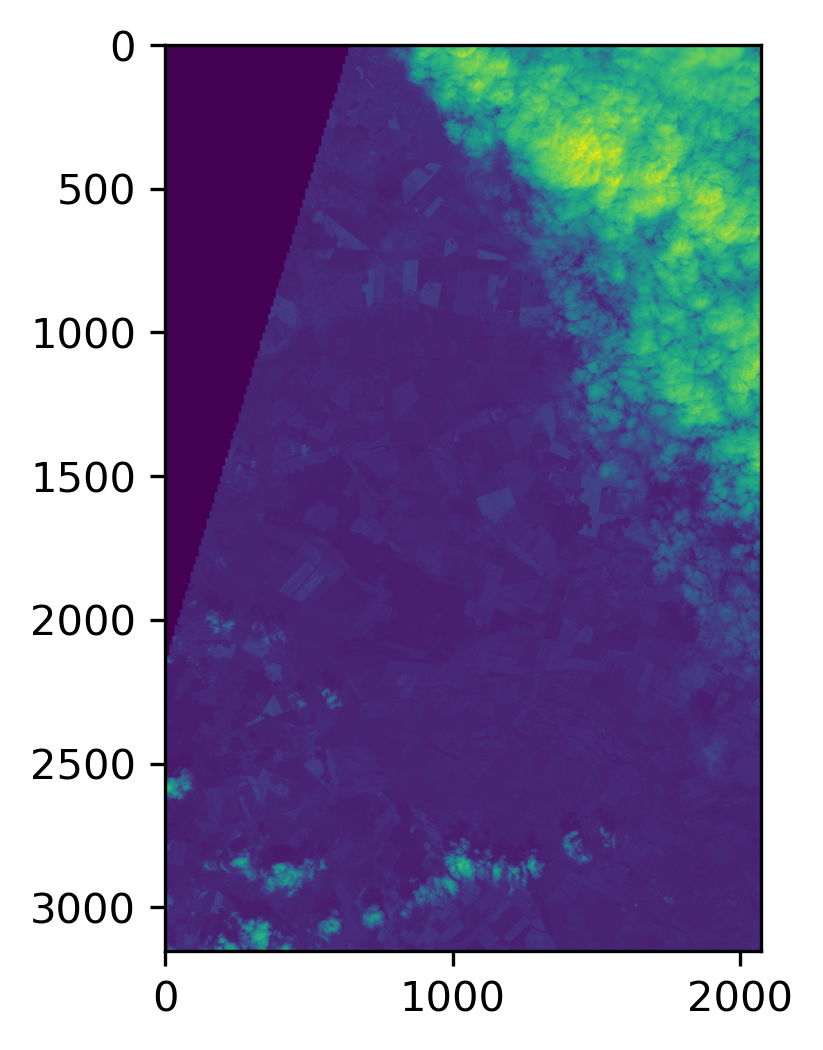

In [35]:
import matplotlib.pyplot as plt 

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.imshow(im1) 
plt.show() 

In [5]:
r_mse(im0, im1)

0.0002687114880423633

In [6]:
s_sim(im0,im1) 

-0.14929790536700982

In [7]:
mean_ssim(im0,im1)

TypeError: mean_ssim() missing 4 required positional arguments: 'row2', 'column2', 'entries1', and 'entries2'